In [45]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords 

## Yelp Reviews

Using data from the Yelp Reviews dataset, let's build a Naive Bayes classifier to classify the sentiment polarity of reviews (positive or negative). The dataset includes just the review text and a sentiment polarity: 1 = positive, 0 = negative.

In [15]:
# Grab and process the raw data.
yelp_raw = pd.read_csv('/Users/teresaoneill/Dropbox/Thinkful/Datasets/yelp_labelled.txt', delimiter= '\t', header=None)
yelp_raw.columns = ['review', 'sentiment']
yelp_raw.head()

,review,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [68]:
#Check how many datapoints are in each category.
yelp_raw['sentiment'].value_counts()

1    500
0    500
Name: sentiment, dtype: int64

For our first try, let's construct a set of keywords for negative sentiment. 

In [73]:
keywords_neg = ['suck', 'else', 'wait', 'gross', 'bad', 'waste', 'rude', 'never', 'terrible']

for key in keywords_neg:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp_raw[str(key)] = yelp_raw.review.str.contains(
        ' ' + str(key),
        case=False
    )

Let's check how independent these keywords are with a heatmap. The keywords we've chosen are pretty independent, so we're not violating the assumptions of the model. 

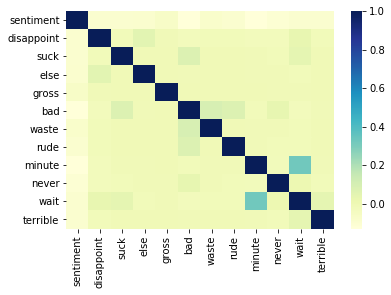

In [74]:
sns.heatmap(yelp_raw.corr(), cmap="YlGnBu")

Next, let's specify the outcome and input variables variables. 

In [75]:
data = yelp_raw[keywords_neg]
target = yelp_raw['sentiment']

In [82]:
# For the binary classifier, we'll use a Bernoulli distribution.
from sklearn.naive_bayes import BernoulliNB

# Instantiate the model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 417


So far, the model is faring just a little better than chance, so it needs some improvements! 

To refine the model, we could construct a bag of words and examine which unigrams occur most frequently in reviews with each sentiment. Because of examples like, "You won't be disappointed," simple unigrams (e.g., 'disappointed') might not get us all the way there. It will be useful to use bigrams and trigrams as well. Such an approach will add complexity (risking overfitting?) and will struggle with examples such as, "I was not one bit disappointed!" but it should improve upon unigrams. 

NOTE: I've started this process, but ran into some Python trouble with tokenization, with error messages popping up that are not consistent with the examples I'm following. One main issue is that I have still not succeeded at using the str.replace method with regular expressions. I also tried re.sub from the re package. I can't figure out why I'm getting a different result than the examples I see. I will continue to look at tutorials online leading up to our next session, and I'll refine this write-up after we check in.

In [79]:
#Tokenize the review text... how?
#Initialize a BOW to get the frequency of all the unigrams by sentiment.
#Exclude the stopwords from nltk.corpus
#BOW is in sklearn

BOW_df = pd.DataFrame(columns=['sentiment'])
words_set = []
for review in yelp_raw:
    sentiment = yelp_raw['sentiment']
    review = yelp_raw['review']
    splitted_text = split_text(text)
    for word in splitted_text:
        if word not in words_set:
            words_set.add(word)
            BOW_df.loc[word] = [0,0,0,0,0]
            BOW_df.ix[word][sentiment] += 1
        else:
            BOW_df.ix[word][sentiment] += 1

#Create a variable to store the bigrams.
#Track their frequency distribition.

bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

#Inspect the sets of unigrams and bigrams.
#Add the new keywords and bigrams to the set of keywords.
#Rerun the model.

keywords_neg = keywords_neg.append('')

for key in keywords_neg:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp_raw[str(key)] = yelp_raw.review.str.contains(
        ' ' + str(key),
        case=False
    )

# Instantiate the model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

NameError: name 'split_text' is not defined